In [123]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import librosa

In [124]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import os
import numpy as np

In [125]:
data_dir = '../data/esc-50'
sample_dir = os.path.join(data_dir, 'sample')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [126]:
print 'Sound Sample Classes'
print '--------------------'
for d in os.listdir(sample_dir):
    print d

Sound Sample Classes
--------------------
rooster
coughing
insects
laughing


In [127]:
samples_dict = dict()
for d in os.listdir(sample_dir):
    sample_class_dir = os.path.join(sample_dir, d)
    samples_dict[d] = [os.path.join(sample_class_dir, f) for f in os.listdir(sample_class_dir)]
print samples_dict

{'insects': ['../data/esc-50/sample/insects/2-82077-A.ogg', '../data/esc-50/sample/insects/3-110913-D.ogg', '../data/esc-50/sample/insects/4-130891-A.ogg', '../data/esc-50/sample/insects/1-46938-A.ogg', '../data/esc-50/sample/insects/3-110913-A.ogg', '../data/esc-50/sample/insects/1-73585-A.ogg', '../data/esc-50/sample/insects/5-198278-C.ogg', '../data/esc-50/sample/insects/5-195517-A.ogg', '../data/esc-50/sample/insects/4-191246-B.ogg', '../data/esc-50/sample/insects/2-81970-A.ogg', '../data/esc-50/sample/insects/5-198278-B.ogg', '../data/esc-50/sample/insects/2-160128-A.ogg', '../data/esc-50/sample/insects/1-7973-A.ogg', '../data/esc-50/sample/insects/1-17585-A.ogg', '../data/esc-50/sample/insects/5-233787-A.ogg', '../data/esc-50/sample/insects/2-81970-C.ogg', '../data/esc-50/sample/insects/3-104761-A.ogg', '../data/esc-50/sample/insects/2-99955-A.ogg', '../data/esc-50/sample/insects/3-105236-A.ogg', '../data/esc-50/sample/insects/5-194932-A.ogg', '../data/esc-50/sample/insects/1-195

In [128]:
sample_insect = samples_dict.get('insects')[0]
ts, sr = librosa.load(sample_insect)

mfcc_feat_insect = mfcc(ts, sr)
# fbank_feat = logfbank(sig,rate)

print mfcc_feat_insect.shape

print(mfcc_feat_insect[1:3,:])

print np.mean(mfcc_feat_insect, axis=0)

(500, 13)
[[ -4.68614246  12.62423878 -24.97087085   6.03759623 -27.55374851
  -11.81426764 -28.00337788 -13.32439396 -27.37921945 -25.95990156
  -31.98620766 -25.91547358  -5.94544254]
 [ -4.59113579  16.04960039 -22.70048431  13.46216773 -21.45153629
   -0.65244403 -20.716485    -5.09580855 -22.62683579 -18.44728867
  -23.76891668 -11.43795649   5.51002662]]
[ -3.72910268  18.22257038 -15.26249055  10.25543244 -15.56550214
  -6.17518359 -12.04130746  -0.9019003  -19.86614078 -17.49182495
 -18.15052032 -10.77752176  -0.78273398]


In [129]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [130]:
features = np.empty((0,193))
for k, v in samples_dict.iteritems():
    if k not in ['insects', 'rooster']:
        continue
    for i in v:
        mfccs, chroma, mel, contrast,tonnetz = extract_feature(i)
        ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
        features = np.vstack([features,ext_features])
features = np.array(features)

In [131]:
print features.shape
print features

(76, 193)
[[ -2.71008667e+02   1.11177134e+02  -2.66969894e+01 ...,  -2.03544718e-01
    5.38986268e-02   1.56129083e-02]
 [ -1.56407503e+02   9.77251668e+01  -1.07476905e+01 ...,  -2.87953000e-02
    1.67113321e-02  -1.69867642e-02]
 [ -3.29452760e+02   8.12510017e+01  -1.36530716e+01 ...,   5.45740443e-02
    3.79722129e-03   1.49923403e-03]
 ..., 
 [ -3.63268630e+02   6.90050961e+01  -3.72877700e+01 ...,   5.50453641e-02
    1.28585464e-02   2.33410783e-02]
 [ -3.84840993e+02   1.69023967e+01  -5.72822369e+01 ...,  -2.54607864e-02
    2.36396857e-03   1.05883214e-02]
 [ -4.02324001e+02   5.29785707e+01  -1.98304410e+01 ...,   1.55105148e-02
    2.81266963e-04   2.88463003e-03]]


In [132]:
km = KMeans(2).fit(features)
# cluster_centers_indices = af.cluster_centers_indices_
labels = km.labels_
print labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [133]:
af = AffinityPropagation(damping=0.5, preference=None).fit(features)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print labels

[ 0  2  1  1  1  2  2  7  1  1  2  1  1  1  7  7  1  7  1  1  7  7  3  1  2
  1  1  1  1  2  1  1  1  1  1  2  2  8  7  9  4  5  8  7  9  7  7  9  7  5
  6  8  8  9  7  7  5  7  7  8  7  8  9  7  7  7  7 10 11  8  7  7  8  7  7
  7]


In [134]:
spectral = SpectralClustering(2).fit(features)
labels = spectral.labels_
print labels

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]


In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(features).transform(features)

In [136]:
print X_r.shape
labels = ['insects', 'rooster']
y = np.array([0] * 38 + [1] * 38)
print y.shape

(76, 2)
(76,)


explained variance ratio (first two components): [ 0.50755213  0.19593257]


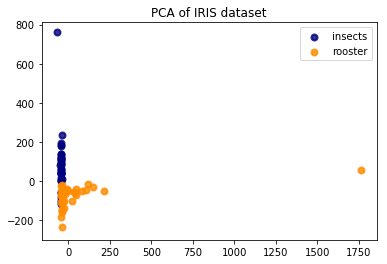

In [137]:
import matplotlib.pyplot as plt

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], labels):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()